In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install seaborn
!pip install sklearn

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [29]:
#Importing the dataset
bike = pd.read_csv('C:/Users/Hp/Documents/Project/bike count prediction/bikeshare.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
# check for missing values in the bike dataset
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [31]:
#find correlation betwwen count and temp
corr_data=bike[['temp','count']].corr()
print(corr_data)

           temp     count
temp   1.000000  0.394454
count  0.394454  1.000000


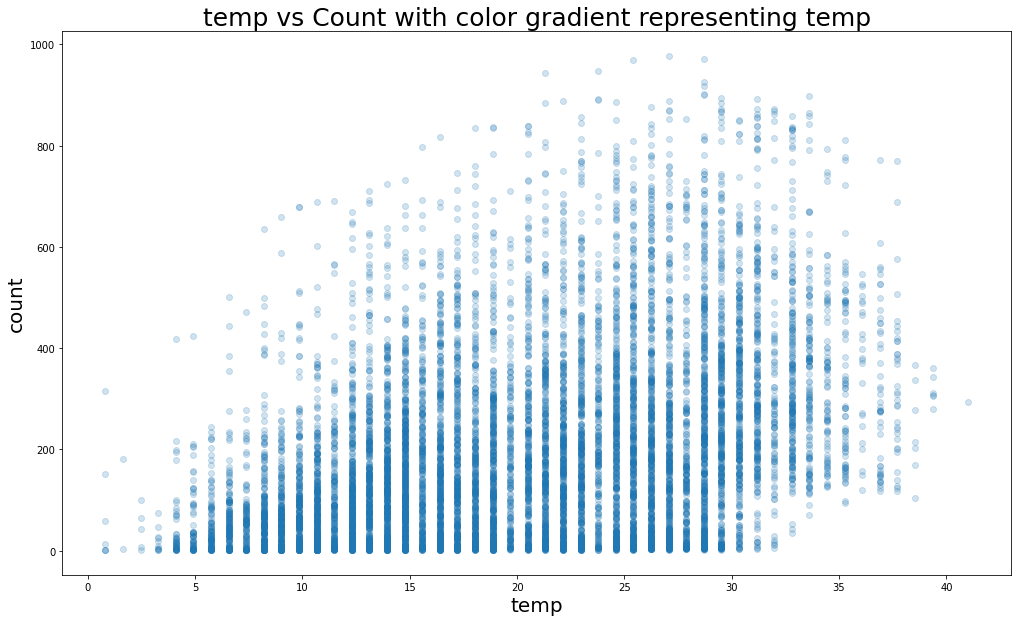

In [32]:
#Create a scatter plot of count vs temp
plt.figure(figsize=(17,10))
plt.scatter(data=bike, x='temp', y='count', alpha=0.2)
plt.title('temp vs Count with color gradient representing temp',fontsize=25)
plt.xlabel('temp', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid(False)
#cb= plt.colorbar()
#cb.set_label('Temp', fontsize=20)
plt.show() 
 

In [33]:
#Plot count versus datetime as a scatterplot with a color gradient based on temperature. 
#You'll need to convert the datetime column into datetime before plotting.

bike['datetime']=pd.to_datetime(bike.datetime)


In [34]:
hour = bike['datetime'].dt.hour 
bike['hours']=hour
day = bike['datetime'].dt.day 
bike['day']=day
month = bike['datetime'].dt.month 
bike['month']=month
year = bike['datetime'].dt.year 
bike['year']=year


print(bike.tail())

                 datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  hours  day  \
10881  19.695        50    26.0027       7         329    336     19   19   
10882  17.425        57    15.0013      10         231    241     20   19   
10883  15.910        61    15.0013       4         164    168     21   19   
10884  17.425        61     6.0032      12         117    129     22   19   
10885  16.665        66     8.9981       4          84     88     23   19   

       month  year  
10881     12  2012  
10882     12  2012  
10883     12  2012  
10884   

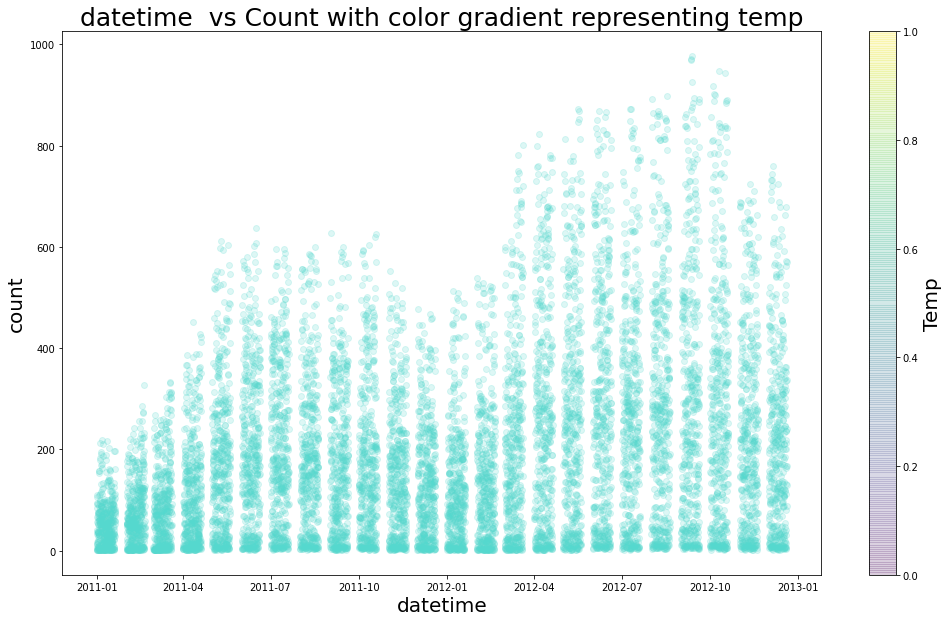

In [35]:
#Create a scatter plot of count vs datetime
plt.figure(figsize=(17,10))
plt.scatter(data=bike, x='datetime', y='count', alpha=0.2, c='#55D8CE')
plt.title('datetime  vs Count with color gradient representing temp',fontsize=25)
plt.xlabel('datetime', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid(False)
cb= plt.colorbar()
cb.set_label('Temp', fontsize=20)
plt.show()

In [36]:
bike['season']=bike.season.astype('category')
bike['weather']=bike.weather.astype('category')
#bike['humidity']=bike.humidity.astype('category')
bike['holiday']=bike.holiday.astype('category')
#bike['windspeed']=bike.windspeed.astype('category')
bike['workingday']=bike.workingday.astype('category')
#bike['atemp']=bike.atemp.astype('category')

In [37]:
import seaborn as sns


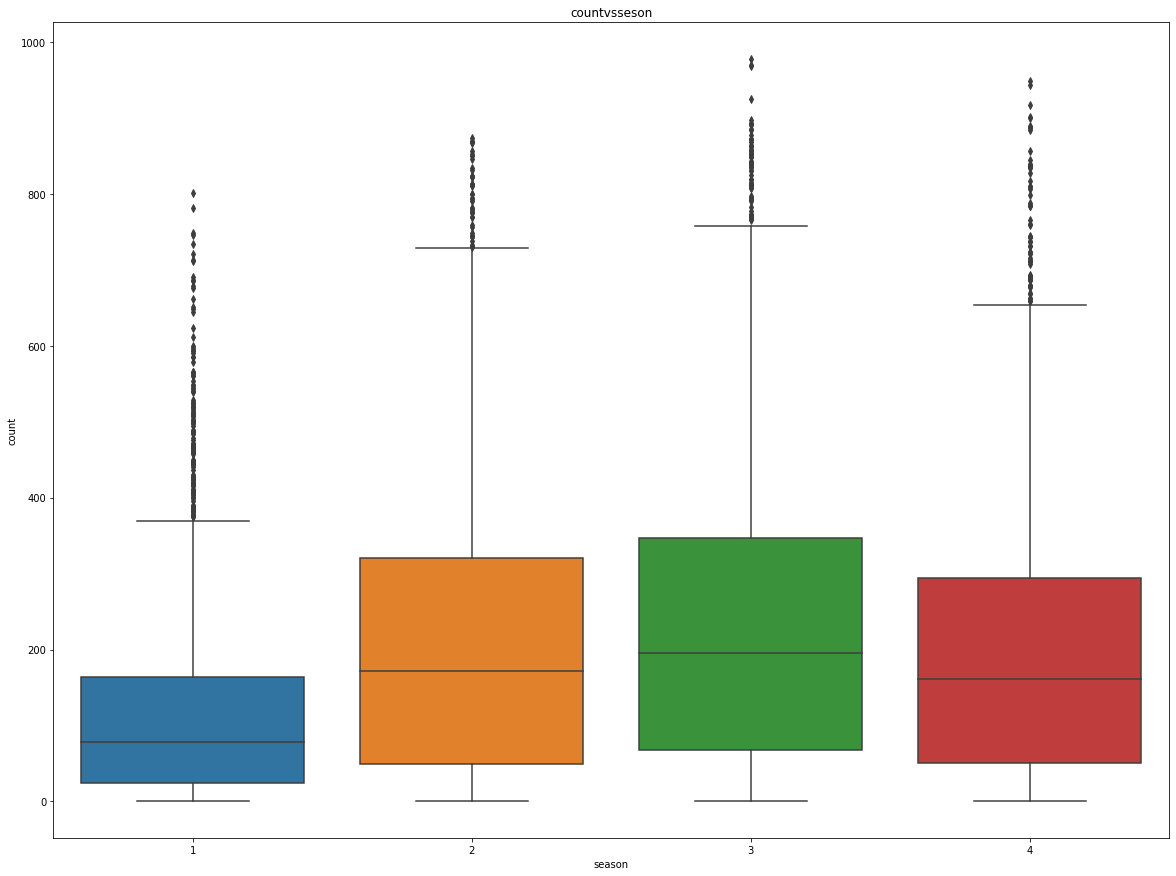

In [38]:
fig,ax=plt.subplots(figsize=(20,15))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(x='season', y='count',data=bike)
ax.set_title('countvsseson')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [43]:
Y=bike['count']
X=bike.drop(columns=['count','datetime','casual','registered'])
x_training,x_test,y_training,y_test=train_test_split(X,Y) #random spliting, bydefault 75% training data, 25% test data

In [44]:
X.shape

(10886, 12)

In [45]:
x_training.shape

(8164, 12)

In [46]:
x_test.shape

(2722, 12)

In [47]:
y_training.shape

(8164,)

In [48]:
y_test.shape

(2722,)

In [49]:
model.fit(x_training,y_training)

LinearRegression()

In [50]:
y_predict=model.predict(x_test)
y_predict

array([304.43464813,  11.99143291,  59.6781095 , ..., 159.68202692,
       224.13538331, 328.53546883])

In [51]:
model.coef_

array([-11.0386342 ,  -5.23405891,   2.58704579,  -3.32334301,
         1.53216076,   4.72530808,  -2.12524085,   0.56961977,
         7.76641418,   0.28718282,  11.25947184,  83.74586632])

In [52]:
model.intercept_

-168416.42047207893

In [53]:
y_predict.shape

(2722,)

In [54]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_predict)

0.3749934134004529